In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import cluster_utils as utl
import warnings
warnings.filterwarnings('ignore')

### Loading and prepping data

In [2]:
# forming the groups
group1 = ['data/89-90.csv', 'data/90-91.csv',
          'data/91-92.csv', 'data/92-93.csv', 'data/93-94.csv']

group2 = ['data/94-95.csv', 'data/95-96.csv',
          'data/96-97.csv', 'data/97-98.csv', 'data/98-99.csv']

group3 = ['data/99-00.csv', 'data/00-01.csv',
          'data/01-02.csv', 'data/02-03.csv', 'data/03-04.csv']

group4 = ['data/05-06.csv', 'data/06-07.csv',
          'data/07-08.csv', 'data/08-09.csv', 'data/09-10.csv']

group5 = ['data/10-11.csv', 'data/11-12.csv',
          'data/12-13.csv', 'data/13-14.csv', 'data/14-15.csv']

group6 = ['data/15-16.csv', 'data/16-17.csv',
          'data/17-18.csv', 'data/18-19.csv', 'data/19-20.csv']

In [3]:
group1 = utl.combine_seasons(group1)
group2 = utl.combine_seasons(group2)
group3 = utl.combine_seasons(group3)
group4 = utl.combine_seasons(group4)
group5 = utl.combine_seasons(group5)
group6 = utl.combine_seasons(group6)

In [4]:
# group 6 had additional positions (13 players in total) converting them to RW
group6['Pos'] = np.where(group6['Pos'] == 'F', 'RW', group6['Pos'])
group6['Pos'] = np.where(group6['Pos'] == 'W', 'RW', group6['Pos'])

In [5]:
X1, player1 = utl.prep_group(group1)
X2, player2 = utl.prep_group(group2)
X3, player3 = utl.prep_group(group3)
X4, player4 = utl.prep_group(group4)
X5, player5 = utl.prep_group(group5)
X6, player6 = utl.prep_group(group6)

In [6]:
goon1 = utl.get_goons(group1)
goon2 = utl.get_goons(group2)
goon3 = utl.get_goons(group3)
goon4 = utl.get_goons(group4)
goon5 = utl.get_goons(group5)
goon6 = utl.get_goons(group6)

goon1.to_csv('data/goons/goon1.csv', index=False)
goon2.to_csv('data/goons/goon2.csv', index=False)
goon3.to_csv('data/goons/goon3.csv', index=False)
goon4.to_csv('data/goons/goon4.csv', index=False)
goon5.to_csv('data/goons/goon5.csv', index=False)
goon6.to_csv('data/goons/goon6.csv', index=False)

### Clustering offense and defense separately

#### Splitting offense and defense

In [7]:
X1_f, player1_f, X1_d, player1_d = utl.split_pos(group1)
X2_f, player2_f, X2_d, player2_d = utl.split_pos(group2)
X3_f, player3_f, X3_d, player3_d = utl.split_pos(group3)
X4_f, player4_f, X4_d, player4_d = utl.split_pos(group4)
X5_f, player5_f, X5_d, player5_d = utl.split_pos(group5)
X6_f, player6_f, X6_d, player6_d = utl.split_pos(group6)

#### Group 1

For n_clusters = 2 The average silhouette_score is : 0.6126065663665888
For n_clusters = 2 The average silhouette_score is : 0.6681690975129192


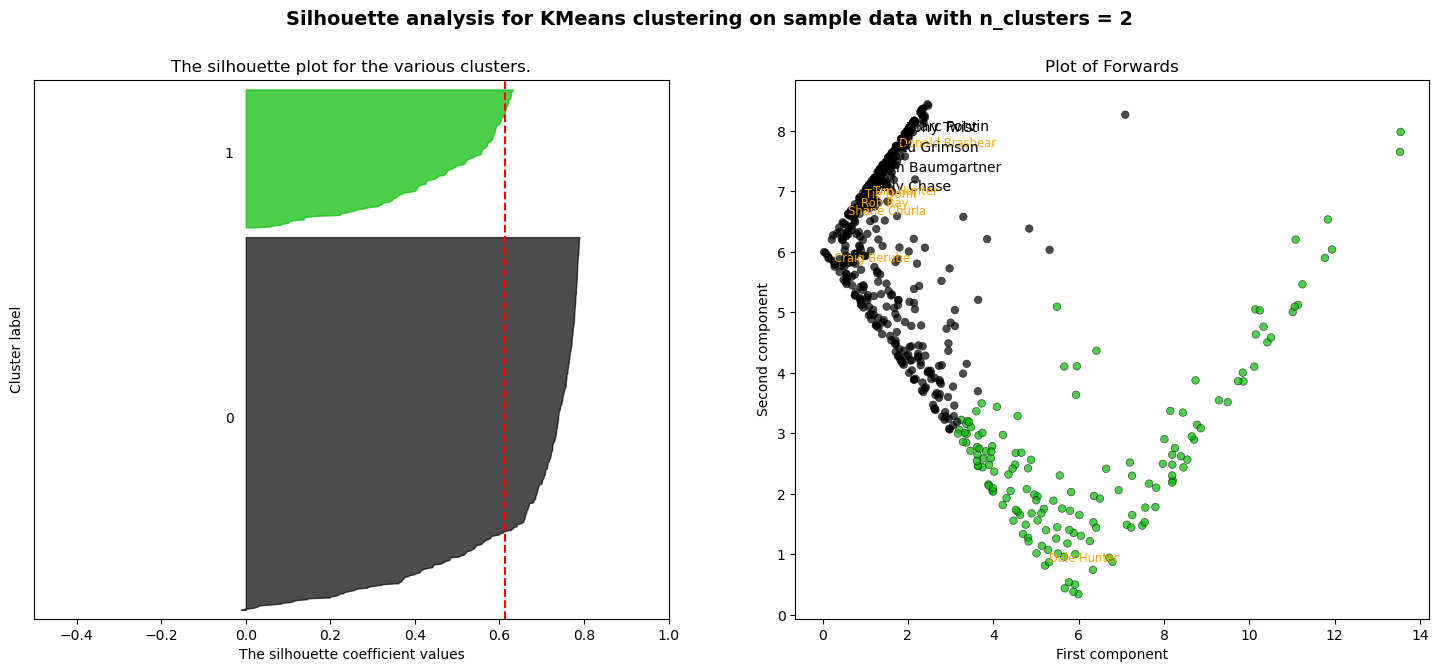

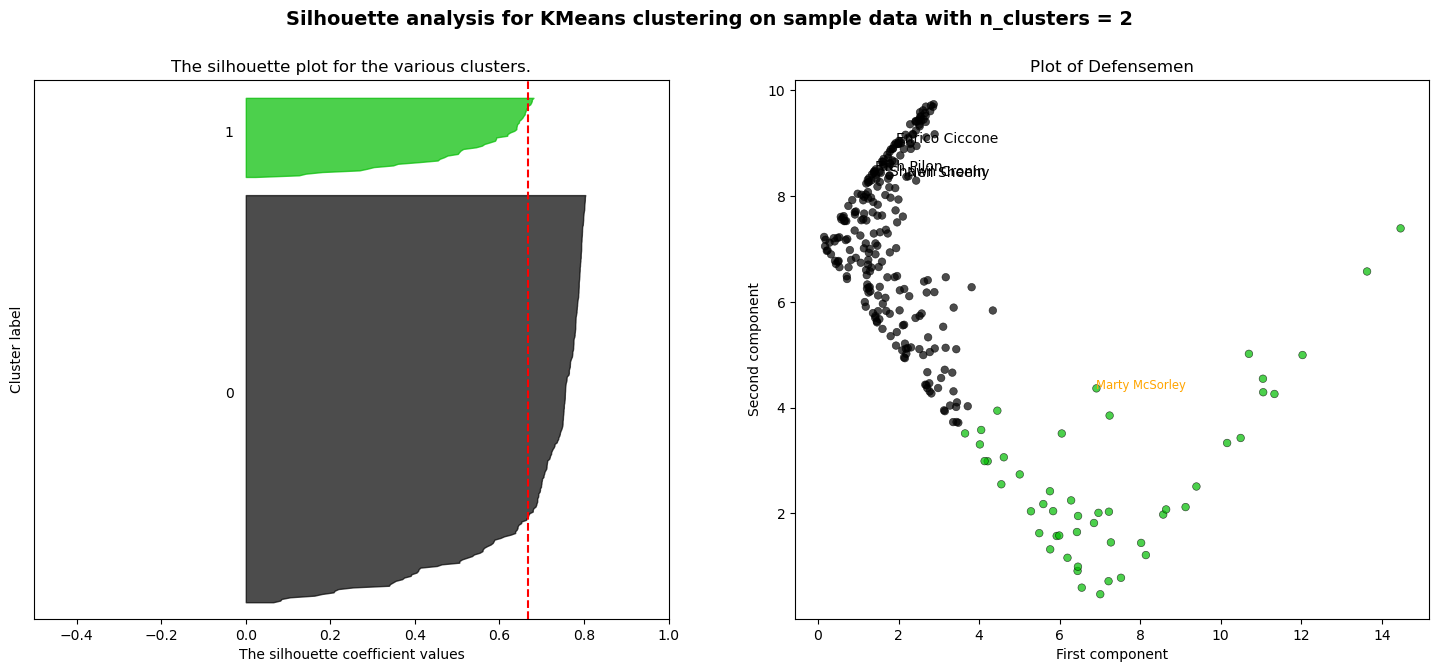

In [8]:
g1_f_final, g1_f_sil = utl.final_cluster(X1_f, player1_f, goon1, path='group1_f')
g1_d_final, g1_d_sil = utl.final_cluster(X1_d, player1_d, goon1, path='group1_d')

#### Group 2

For n_clusters = 2 The average silhouette_score is : 0.5990951236750365
For n_clusters = 2 The average silhouette_score is : 0.6313243975398714


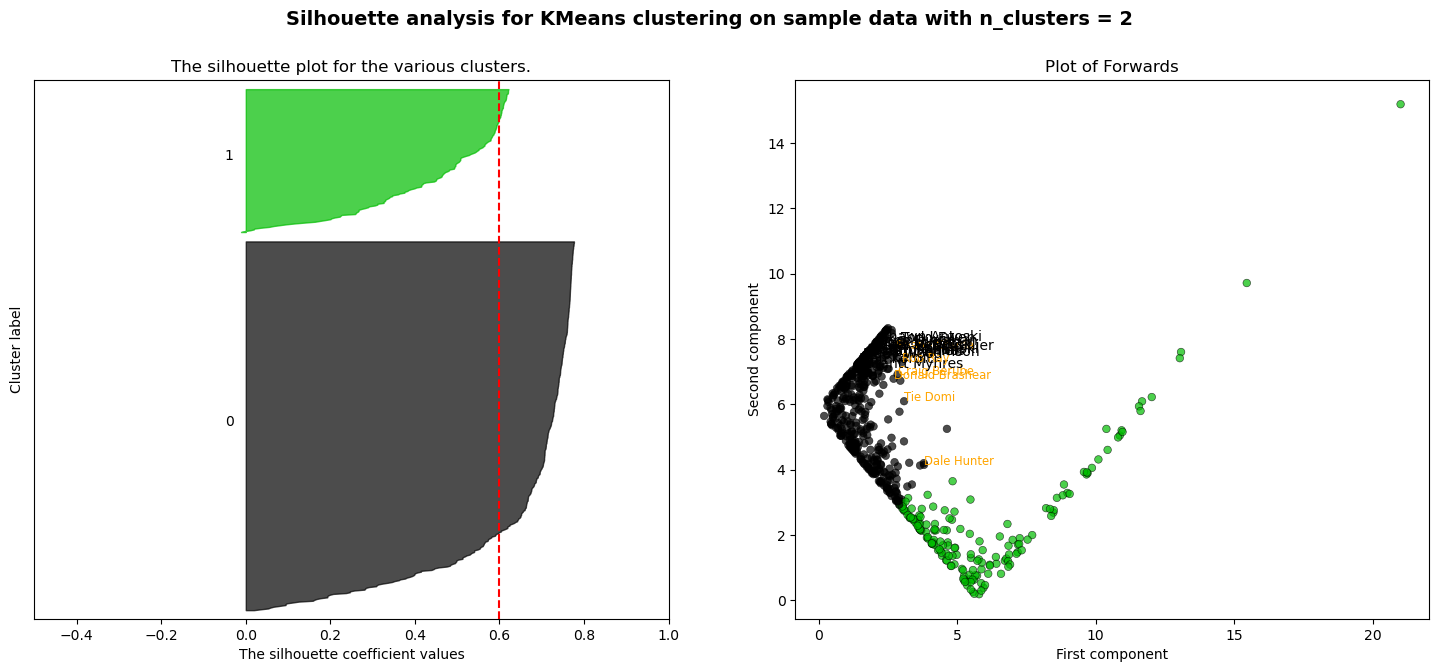

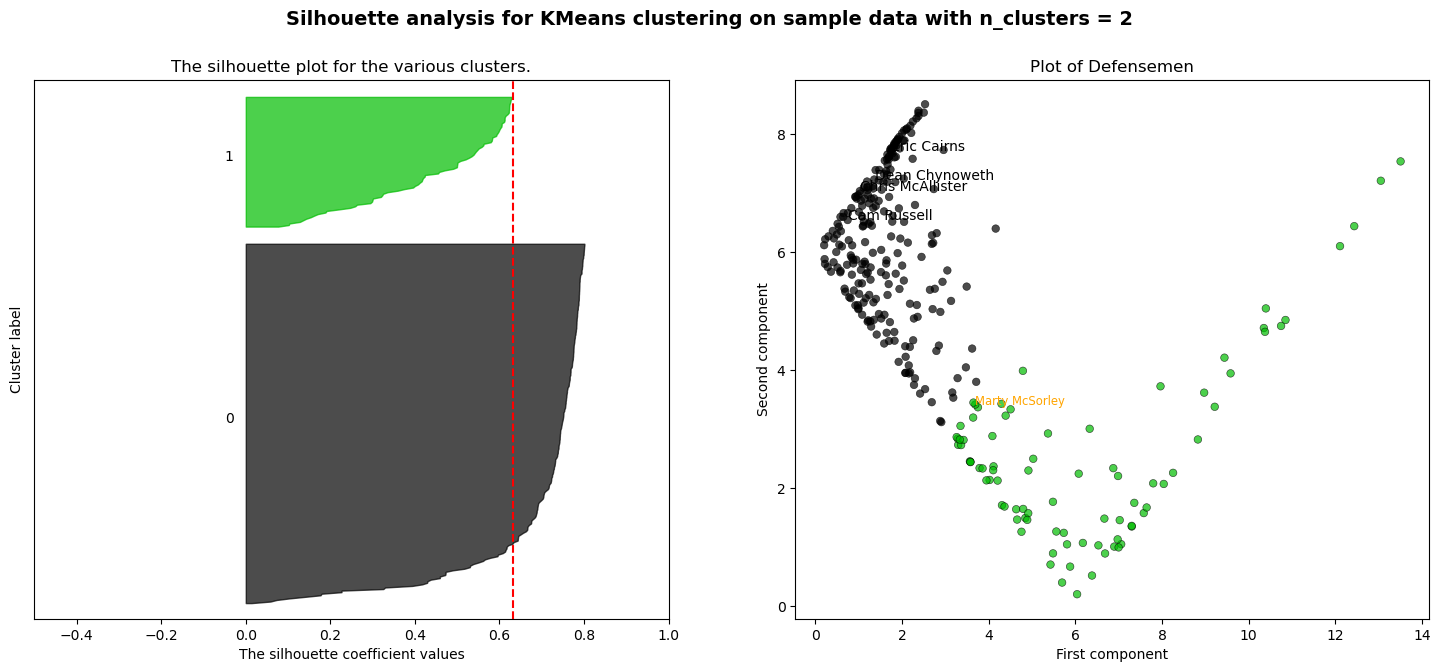

In [9]:
g2_f_final, g2_f_sil = utl.final_cluster(X2_f, player2_f, goon2, path='group2_f')
g2_d_final, g2_d_sil = utl.final_cluster(X2_d, player2_d, goon2, path='group2_d')

#### Group 3

For n_clusters = 2 The average silhouette_score is : 0.6162482748917605
For n_clusters = 2 The average silhouette_score is : 0.5970395892879148


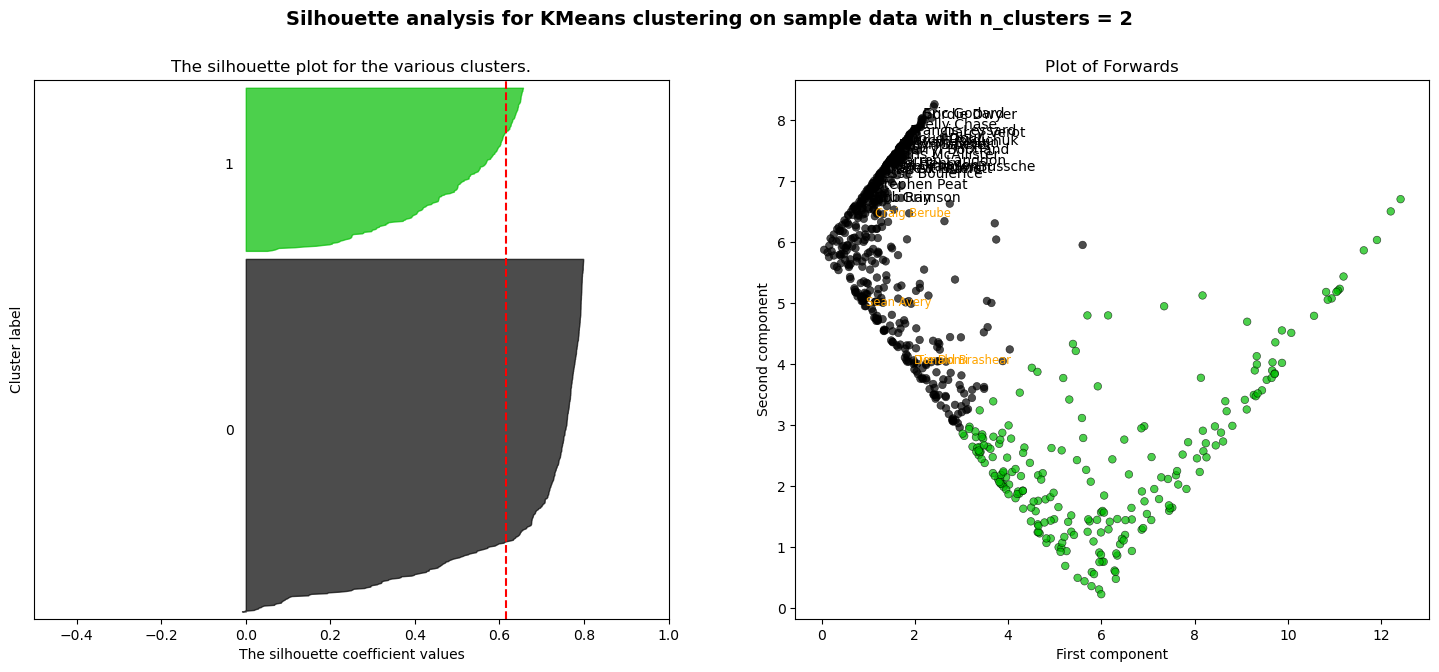

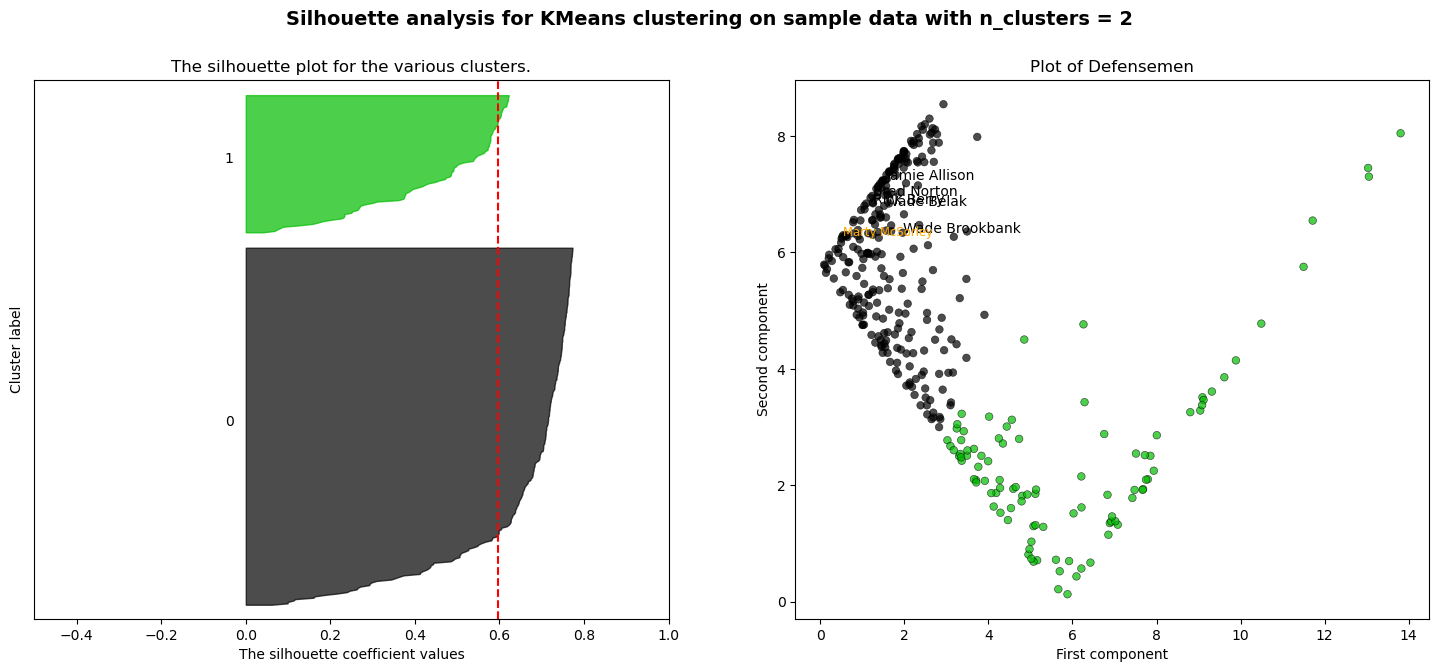

In [10]:
g3_f_final, g3_f_sil = utl.final_cluster(X3_f, player3_f, goon3, path='group3_f')
g3_d_final, g3_d_sil = utl.final_cluster(X3_d, player3_d, goon3, path='group3_d')

#### Group 4

For n_clusters = 2 The average silhouette_score is : 0.5958287332779313
For n_clusters = 2 The average silhouette_score is : 0.5758829700663263


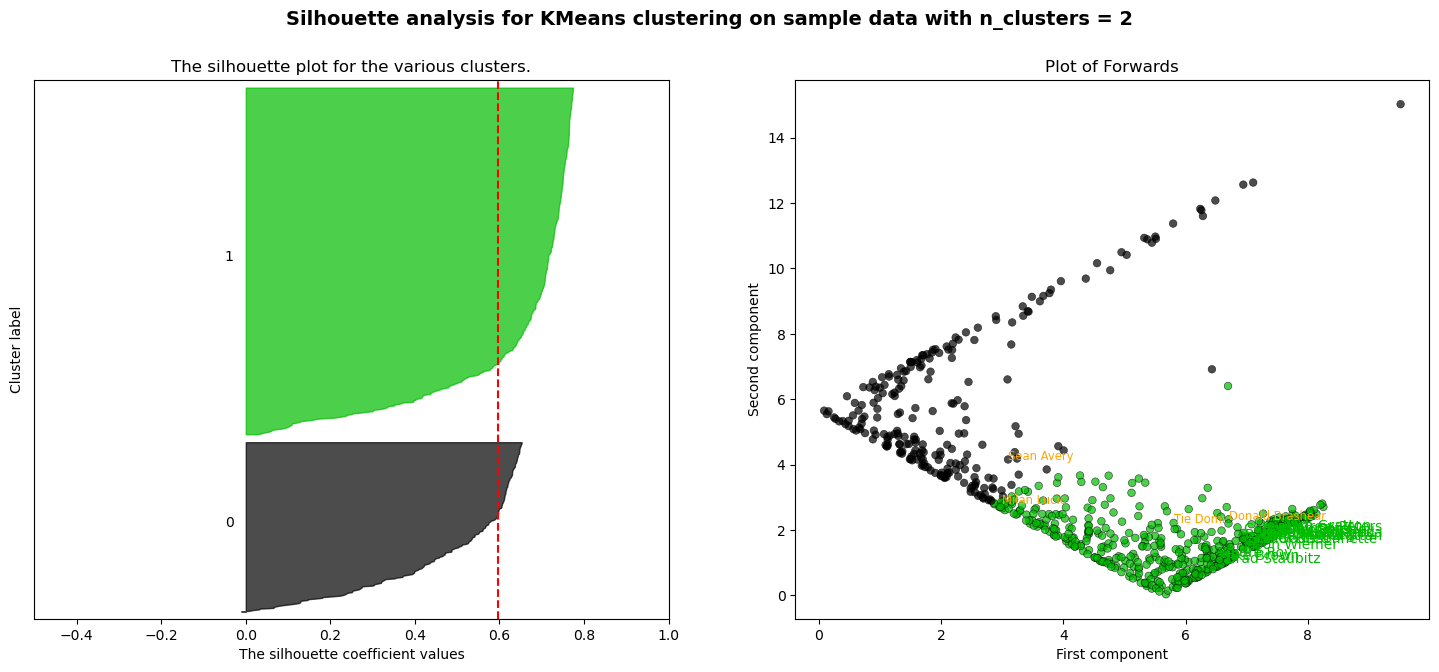

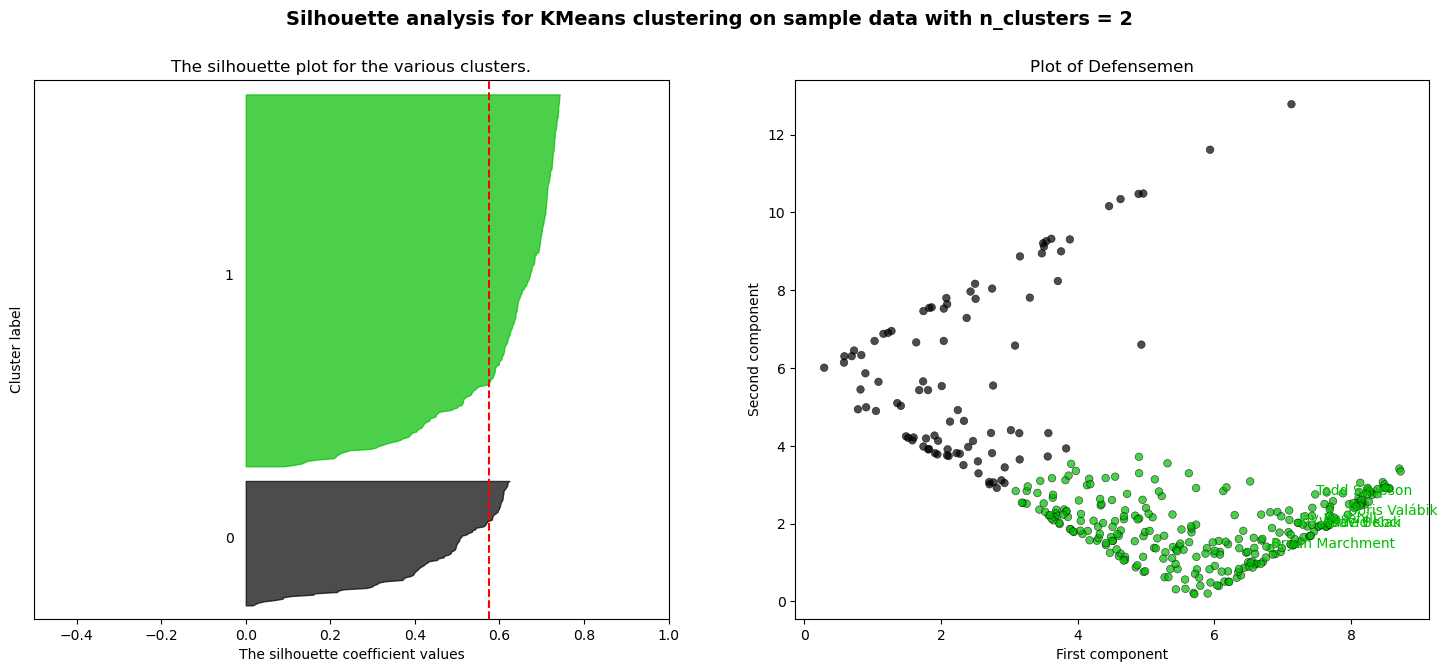

In [11]:
g4_f_final, g4_f_sil = utl.final_cluster(X4_f, player4_f, goon4, path='group4_f')
g4_d_final, g4_d_sil = utl.final_cluster(X4_d, player4_d, goon4, path='group4_d')

#### Group 5

For n_clusters = 2 The average silhouette_score is : 0.5838338848340243
For n_clusters = 2 The average silhouette_score is : 0.5975537740086609


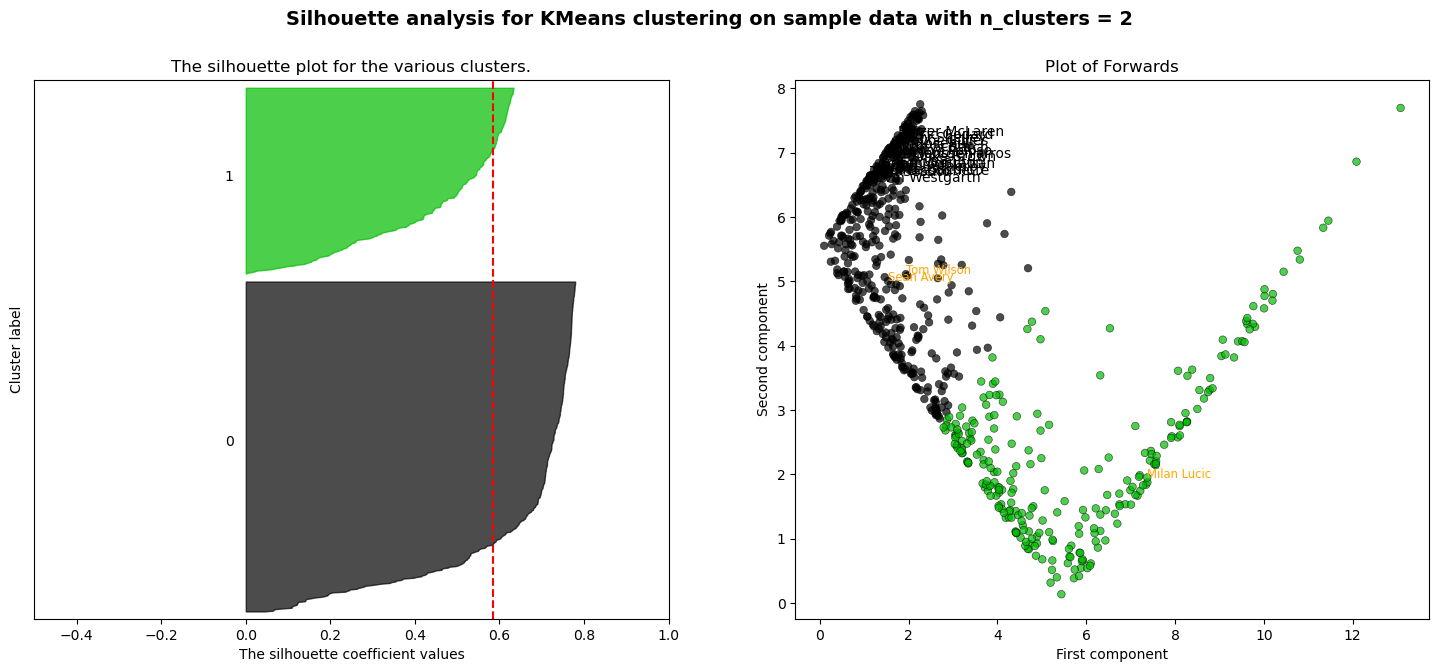

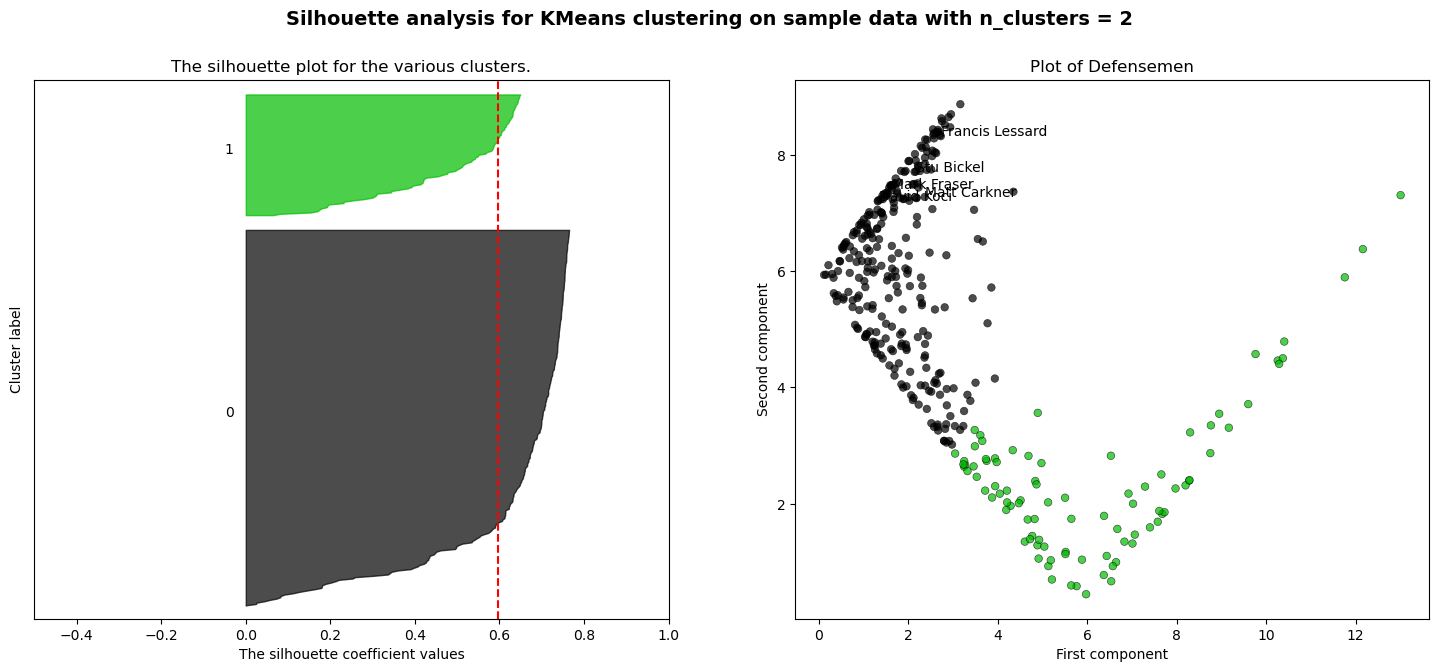

In [12]:
g5_f_final, g5_f_sil = utl.final_cluster(X5_f, player5_f, goon5, path='group5_f')
g5_d_final, g5_d_sil = utl.final_cluster(X5_d, player5_d, goon5, path='group5_d')

#### Group 6

For n_clusters = 2 The average silhouette_score is : 0.5971731566351638
For n_clusters = 2 The average silhouette_score is : 0.6036741345722626


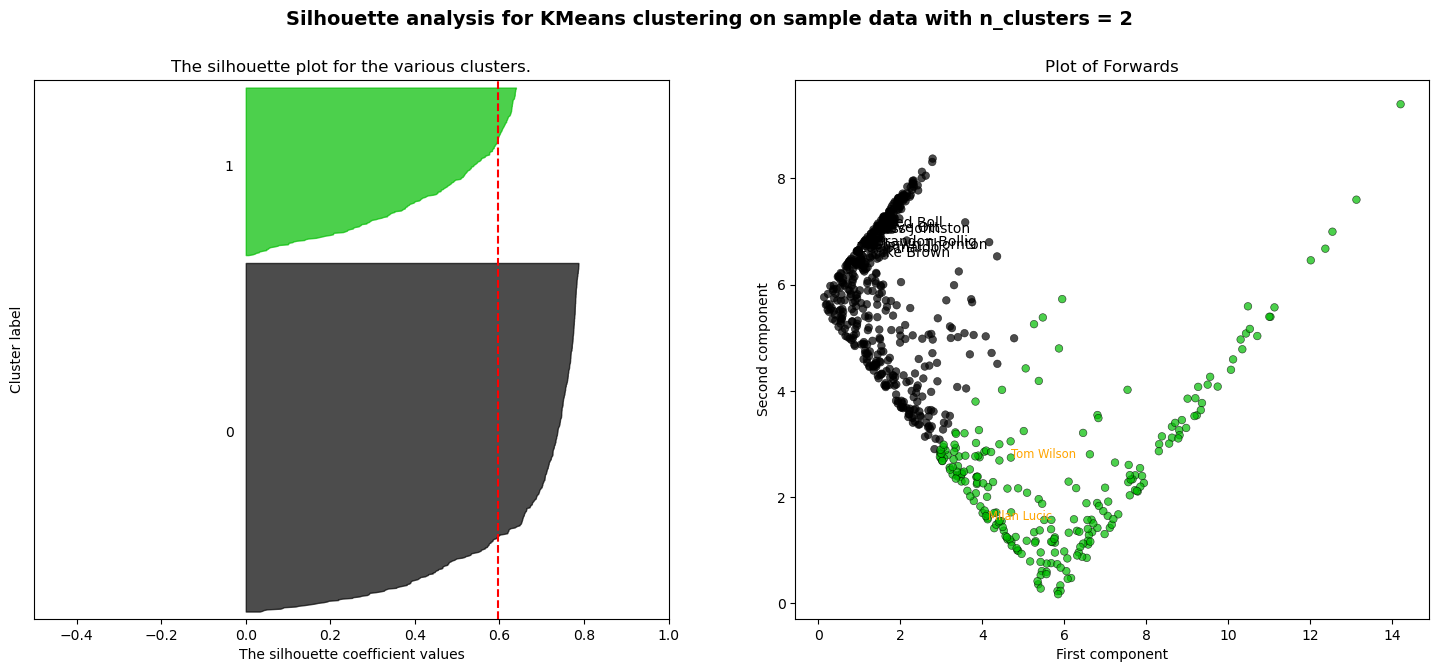

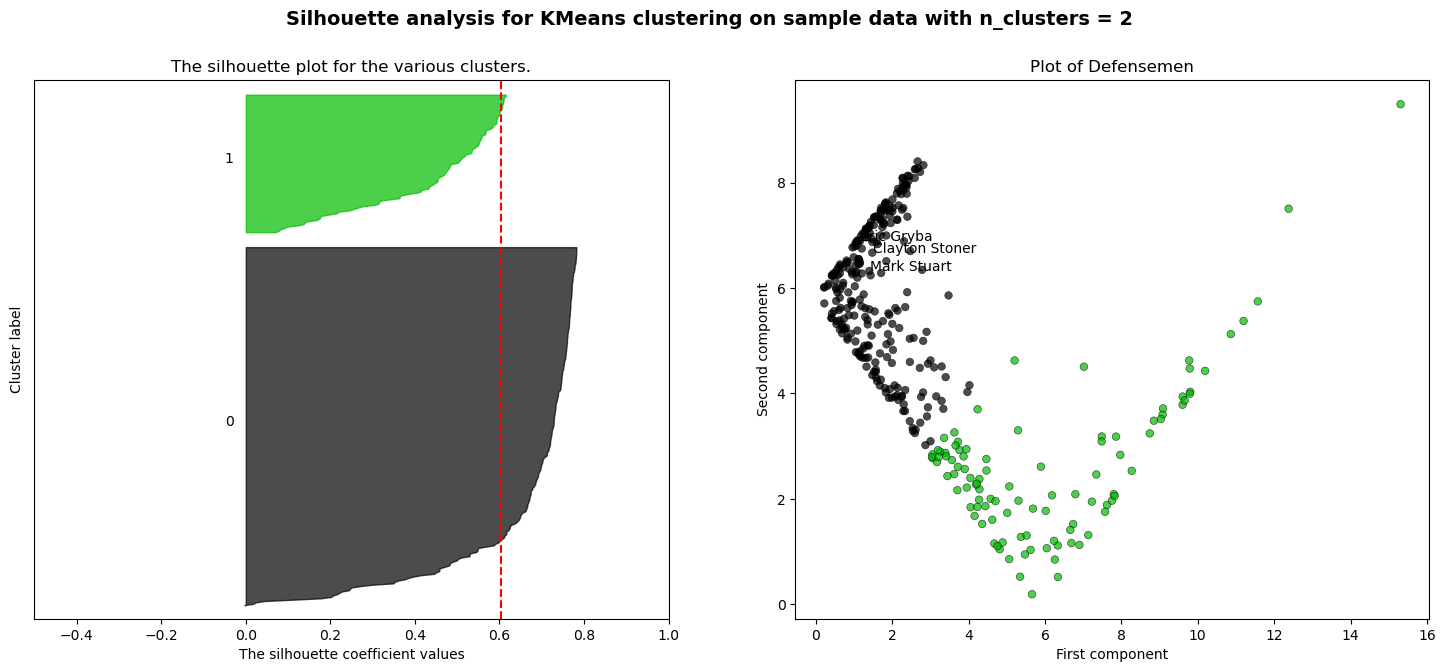

In [13]:
g6_f_final, g6_f_sil = utl.final_cluster(X6_f, player6_f, goon6, path='group6_f')
g6_d_final, g6_d_sil = utl.final_cluster(X6_d, player6_d, goon6, path='group6_d')

### Getting final clusters as dataframes for analysis

In [14]:
g1_f_final.to_csv('cluster_results/final_clusters/g1_f.csv', index=False)
g1_d_final.to_csv('cluster_results/final_clusters/g1_d.csv', index=False)

g2_f_final.to_csv('cluster_results/final_clusters/g2_f.csv', index=False)
g2_d_final.to_csv('cluster_results/final_clusters/g2_d.csv', index=False)

g3_f_final.to_csv('cluster_results/final_clusters/g3_f.csv', index=False)
g3_d_final.to_csv('cluster_results/final_clusters/g3_d.csv', index=False)

g4_f_final.to_csv('cluster_results/final_clusters/g4_f.csv', index=False)
g5_d_final.to_csv('cluster_results/final_clusters/g4_d.csv', index=False)

g5_f_final.to_csv('cluster_results/final_clusters/g5_f.csv', index=False)
g5_d_final.to_csv('cluster_results/final_clusters/g5_d.csv', index=False)

g6_f_final.to_csv('cluster_results/final_clusters/g6_f.csv', index=False)
g6_d_final.to_csv('cluster_results/final_clusters/g6_d.csv', index=False)